In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.special import gamma, jv

In [166]:
def generate_data(n=20):
    X = 10 * np.random.random(size=n).reshape(-1, 1)
#     y = np.sin(X).reshape(-1, 1) + 0.1 * np.random.randn()
    y = 2 * X + 1 * np.random.randn(len(X), 1)
    
    return X, y

In [167]:
X, y = generate_data()

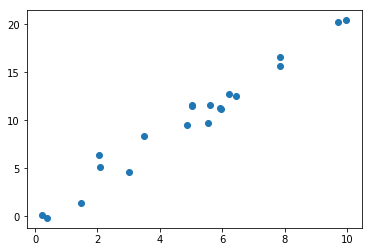

In [168]:
plt.scatter(X, y)

In [169]:
def squared_exponential_kernel(x1, x2, theta):
    return np.exp(-1/(2 * theta**2) * (x1 - x2)**2)

def matern_kernel(x1, x2, p):
    k = 1 / (2**(p - 1) * gamma(p))
    x = 2 * np.sqrt(p) * np.linalg.norm(x1 - x2)
    f1 = x**p
    f2 = jv(p, x)
    return k * f1 * f2

def compute_K(X, kernel):
    K = np.zeros((X.shape[0], X.shape[0]))
    for i in range(X.shape[0]):
        for j in range(i, X.shape[0]):
            K[i, j] = kernel(X[i], X[j])
            K[j, i] = K[i, j]
    return K

def compute_k_new_observation(X, x_new, kernel):
    k = np.array([kernel(x_new, x) for x in X]).reshape(-1, 1)
    return k

def compute_mean(k, K_inv, f):
    return np.dot(k.T, np.dot(K_inv, f))

def compute_variance(x_new, k, K_inv, kernel):
    return kernel(x_new, x_new) - np.dot(k.T, np.dot(K_inv, k))

In [170]:
from functools import partial

kernel = partial(matern_kernel, p=0.07196947)
K = compute_K(X, kernel=kernel)
K_inv = np.linalg.inv(K)

In [171]:
def compute_mean_var(x_new, kernel):
    k = compute_k_new_observation(X, x_new, kernel=kernel)
    return compute_mean(k=k, K_inv=K_inv, f=y), compute_variance(x_new=x_new, k=k, K_inv=K_inv, kernel=kernel)

In [172]:
def plot_in_range(start, stop, kernel):
    X_new = np.arange(start, stop, 0.01)
    means_sigmas = [compute_mean_var(x, kernel=kernel) for x in X_new]
    means = np.concatenate(list(zip(*means_sigmas))[0]).reshape(-1, 1)
    sigmas = np.concatenate(list(zip(*means_sigmas))[1]).reshape(-1, 1)
    
    plt.plot(X_new, means)
    plt.fill_between(
        X_new,
        (means - sigmas).reshape(-1),
        (means + sigmas).reshape(-1),
        alpha=0.1
    )
    plt.scatter(X, y)

### Find the optimal parameters for our covariance function by maximizing log(p(y|x, theta))

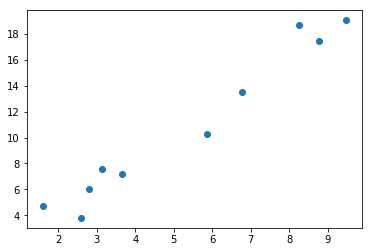

In [173]:
X, y = generate_data(n=10)
plt.scatter(X, y)

In [174]:
def log_p(theta):
    n = 1
    if theta == 0:
        return 0.
    kernel = partial(matern_kernel, p=theta)
#     kernel = partial(squared_exponential_kernel, theta=theta)
    K = compute_K(X, kernel=kernel)
    K_inv = np.linalg.inv(K)

    t1 = -1/2 * np.dot(y.T, np.dot(K_inv, y))
    t2 = - 1/ 2 * np.linalg.det(K)
    t3 = - n / 2 * np.log(2 * np.pi)

    print(t1)
    print(t2)
    print(t3)
    _log_p = t1 + t2 + t3
    
    return -_log_p

In [175]:
from scipy.optimize import minimize_scalar

In [180]:
x_nm = minimize_scalar(log_p, method='Bounded', bounds=[0.001, 10])

[[-1.85564198]]
-1.5099500836715401e+19
-0.9189385332046727
[[-4.22024228]]
1.0546024814227753e+35
-0.9189385332046727
[[-2.80592971]]
2.4497971959175873e+42
-0.9189385332046727
[[-0.92652277]]
2.7320335085924507e+46
-0.9189385332046727
[[-0.21837248]]
1.0242372517836692e+49
-0.9189385332046727
[[-0.0594229]]
3.898848282843876e+50
-0.9189385332046727
[[-0.01309453]]
3.535436310810904e+51
-0.9189385332046727
[[0.00482545]]
1.3469830096487697e+52
-0.9189385332046727
[[0.01318255]]
3.0435245013298977e+52
-0.9189385332046727
[[0.01754675]]
5.01219076287952e+52
-0.9189385332046727
[[0.01998419]]
6.808443003997309e+52
-0.9189385332046727
[[0.02140104]]
8.220699173572494e+52
-0.9189385332046727
[[0.0222446]]
9.233454022832254e+52
-0.9189385332046727
[[0.02275417]]
9.91959578888604e+52
-0.9189385332046727
[[0.02306472]]
1.0368421179544452e+53
-0.9189385332046727
[[0.02325499]]
1.0655712351656527e+53
-0.9189385332046727
[[0.02337196]]
1.0837158487773078e+53
-0.9189385332046727
[[0.02344402]]
1.

In [181]:
x_nm

     fun: array([[-1.11366187e+53]])
 message: 'Solution found.'
    nfev: 30
  status: 0
 success: True
       x: 9.999994785747878

In [182]:
log_p(0.817)

[[221.93165102]]
-0.02799208679273366
-0.9189385332046727


array([[-220.9847204]])

In [179]:
plot_in_range(
    start=0,
    stop=10,
    kernel=partial(
        matern_kernel,
        p=-220.9847204
    )
)

/Users/sjosund/.virtualenvs/koe/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in double_scalars
  """
/Users/sjosund/.virtualenvs/koe/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in sqrt
  


ValueError: shapes (20,20) and (10,1) not aligned: 20 (dim 1) != 10 (dim 0)